In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


now importing dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

you can plot an image using matplotlib's imshow function with a binary color map


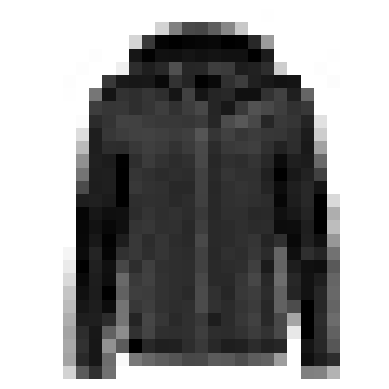

In [4]:
plt.imshow(X_train[0],cmap = 'binary')
plt.axis("off")
plt.show()

the labels are class ids (represented as uint8) from 0 to 9

In [5]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [6]:
len(y_train)

55000

In [7]:
y_train[0]

np.uint8(4)

here are the corresponding class names

In [8]:
class_names = ["tshirt/top","trouser","pull over", "dress","coat","sandal","shirt","sneaker","bag","ankel boot"]

so first image i the training set is a coat

In [9]:
class_names[y_train[0]]

'coat'

the validation set contains 5,000 images and the training set contains 10,000 images

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

now lets look at a sample of images in our data set

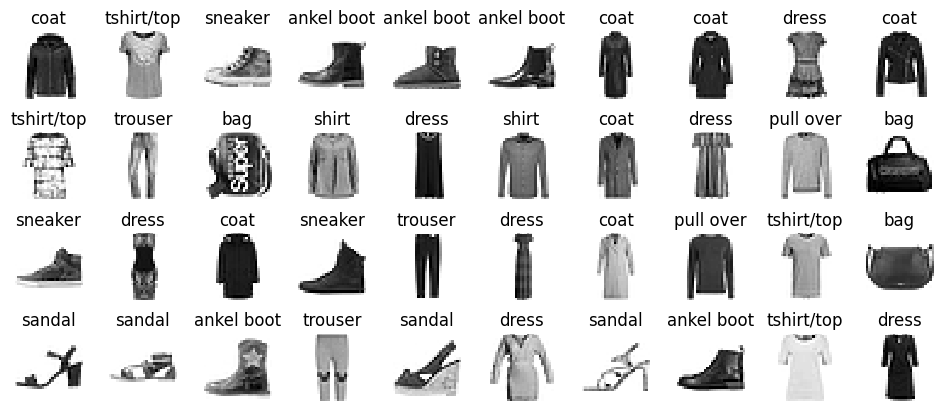

In [12]:
n_rows = 4
n_colns = 10
plt.figure(figsize=(n_colns*1.2,n_rows*1.2))
for row in range(n_rows):
  for coln in range(n_colns):
    index = n_colns * row + coln
    plt.subplot(n_rows,n_colns,index + 1)
    plt.imshow(X_train[index], cmap = "binary", interpolation = "nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]],fontsize = 12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))


In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
print(model.layers)

[<Flatten name=flatten_1, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

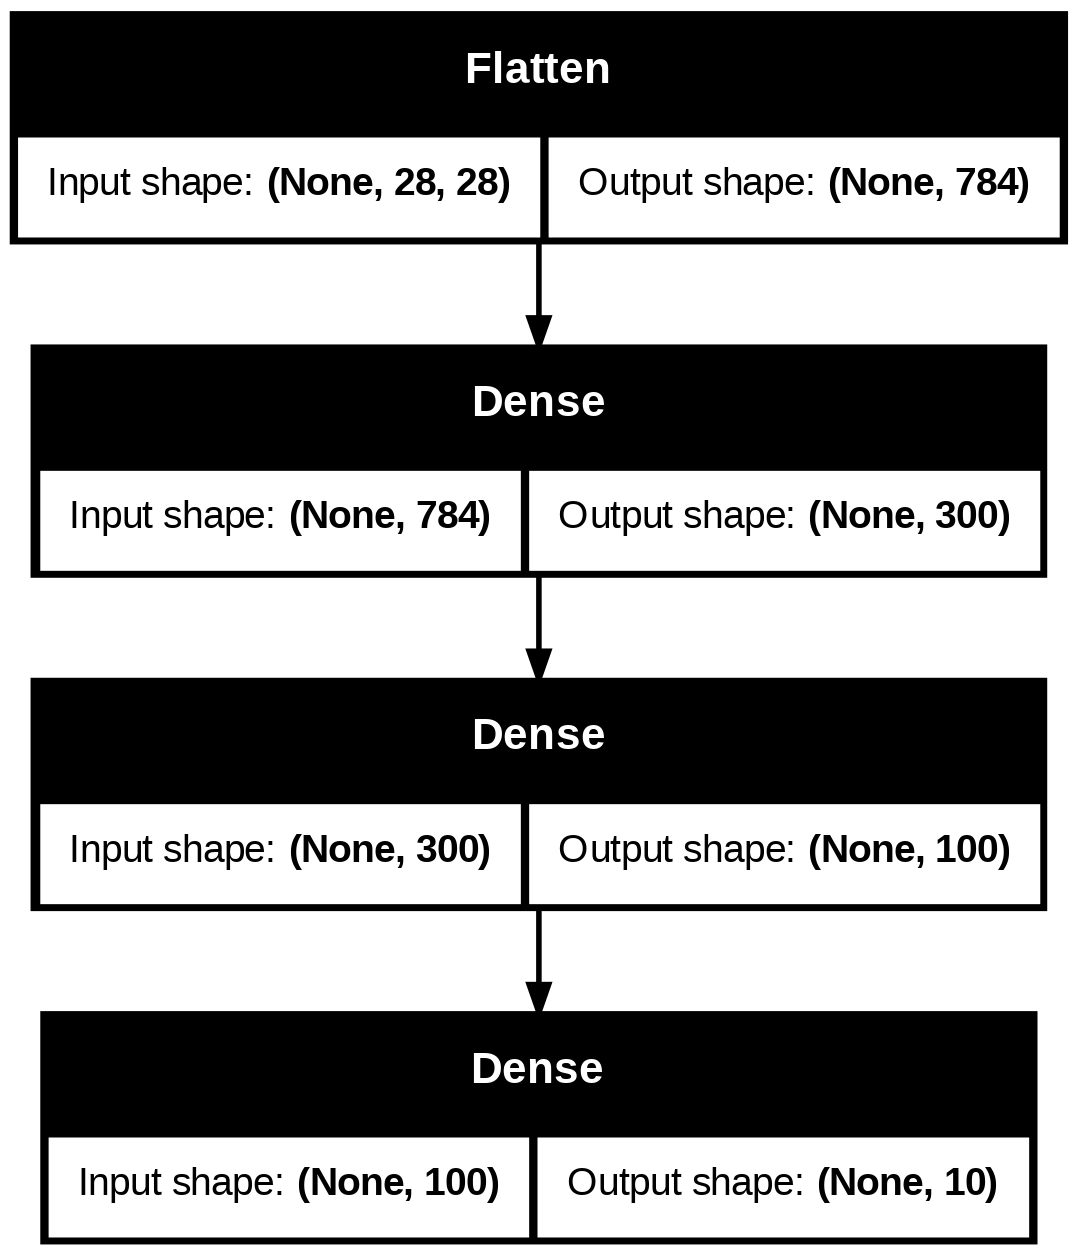

In [18]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png" , show_shapes=True)

In [19]:
hidden1 = model.layers[1]

In [77]:
model.compile(
    optimizer ="sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

the above stands for this

```
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001,beta_1 = 0.9,beta_2 = 0.999),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = [keras.metrics.sparse_categorical_accuracy]
)
```

the model has been compiled


In [78]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_valid,y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8089 - loss: 0.5076 - val_accuracy: 0.8172 - val_loss: 0.9012
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8088 - loss: 0.5076 - val_accuracy: 0.8172 - val_loss: 0.9099
Epoch 3/30
1390/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.5091

KeyboardInterrupt: 

In [59]:
print(history.params)

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}


In [60]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

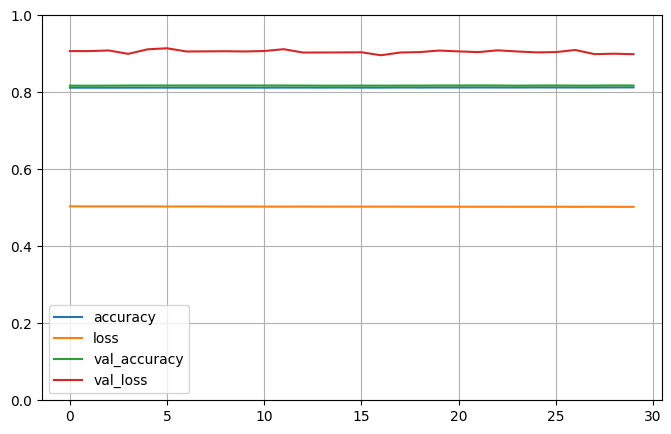

In [75]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [79]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.9963


[1.0037797689437866, 0.7950999736785889]